### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import KFold,train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB


%matplotlib inline

### Load The Dataset and cleaning it Also merge it
see if any null values were found or  data type of the column is not correct

In [92]:
df_train=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')
df_sample=pd.read_csv('sample_submission.csv')
df=df_train # i will use this data because i know the target column , in df_test  the target column were not found also the target column in df_sample all of it values is equal to zero

In [128]:
df_test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [129]:
df_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,Vapi
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai


In [93]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [94]:
print(f"Number of Null Values = {df.isna().sum().sum()}")

print(f"Number of Duplicated Rows = {df.duplicated().sum()}")

Number of Null Values = 0
Number of Duplicated Rows = 401


- ##### The data is Clean no null value found 
- ##### 401  repeated row were found and 
       - this row will be deleted
- ##### each column has it's corrected datatype

## Drop the Duplicated Rows

In [95]:
df[df.duplicated()]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1904,Dealer,1,0,3,BHK,1209.628644,0,1,"Salt Lake,Kolkata",22.541110,88.337780,100.0
2351,Dealer,0,0,2,BHK,896.680112,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,28.9
2611,Dealer,0,0,3,BHK,1350.256549,1,1,"Sector 78 Faridabad,Faridabad",28.380160,77.369936,50.0
2618,Dealer,1,0,2,BHK,800.000000,0,1,"Chandapura,Bangalore",12.800090,77.711820,27.0
3211,Owner,0,0,2,BHK,712.105799,1,1,"BataNagar,Kolkata",22.506860,88.223965,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29321,Dealer,0,1,1,BHK,649.641577,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,14.5
29345,Dealer,1,1,3,BHK,1563.155686,0,1,"Sector-88 Mohali,Mohali",30.684523,76.691728,74.5
29357,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.596320,77.381430,75.0
29389,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9


In [96]:
df[df['SQUARE_FT']==1446.201311].head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
4588,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.59632,77.38143,75.0
19901,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.59632,77.38143,75.0
29357,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.59632,77.38143,75.0


In [97]:
df.shape

(29451, 12)

In [98]:
df.drop_duplicates(inplace=True)

In [99]:
df.shape

(29050, 12)

# Explore The DataSet
### Description of the dataset

In [100]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29050.000000,29050.000000,29050.000000,2.905000e+04,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000
mean,0.178967,0.315869,2.390809,2.003171e+04,0.821033,0.930361,21.270272,76.829585,141.712677
std,0.383332,0.464869,0.880677,1.914411e+06,0.383332,0.254541,6.195973,10.567572,650.055763
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.452663,73.794800,38.000000
50%,0.000000,0.000000,2.000000,1.172742e+03,1.000000,1.000000,20.631532,77.322873,61.750000
75%,0.000000,1.000000,3.000000,1.550169e+03,1.000000,1.000000,26.886881,77.912934,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


- ###### the Standard divination `TARGET(PRICE_IN_LACS)`  column it's high ,that indicates that most of the prices in the data set are very far from the mean 

- ###### also the min value in the target column is 0.25 that indicates that some houses prices are near zero cost

- ###### [`SQUARE_FT`,`BHK_NO`,`TARGET(PRICE_IN_LACS)`,`LONGITUDE`,`LATITUDE`] are only the continuous numerical data


### Is The Data Correlated to each other  

<AxesSubplot:>

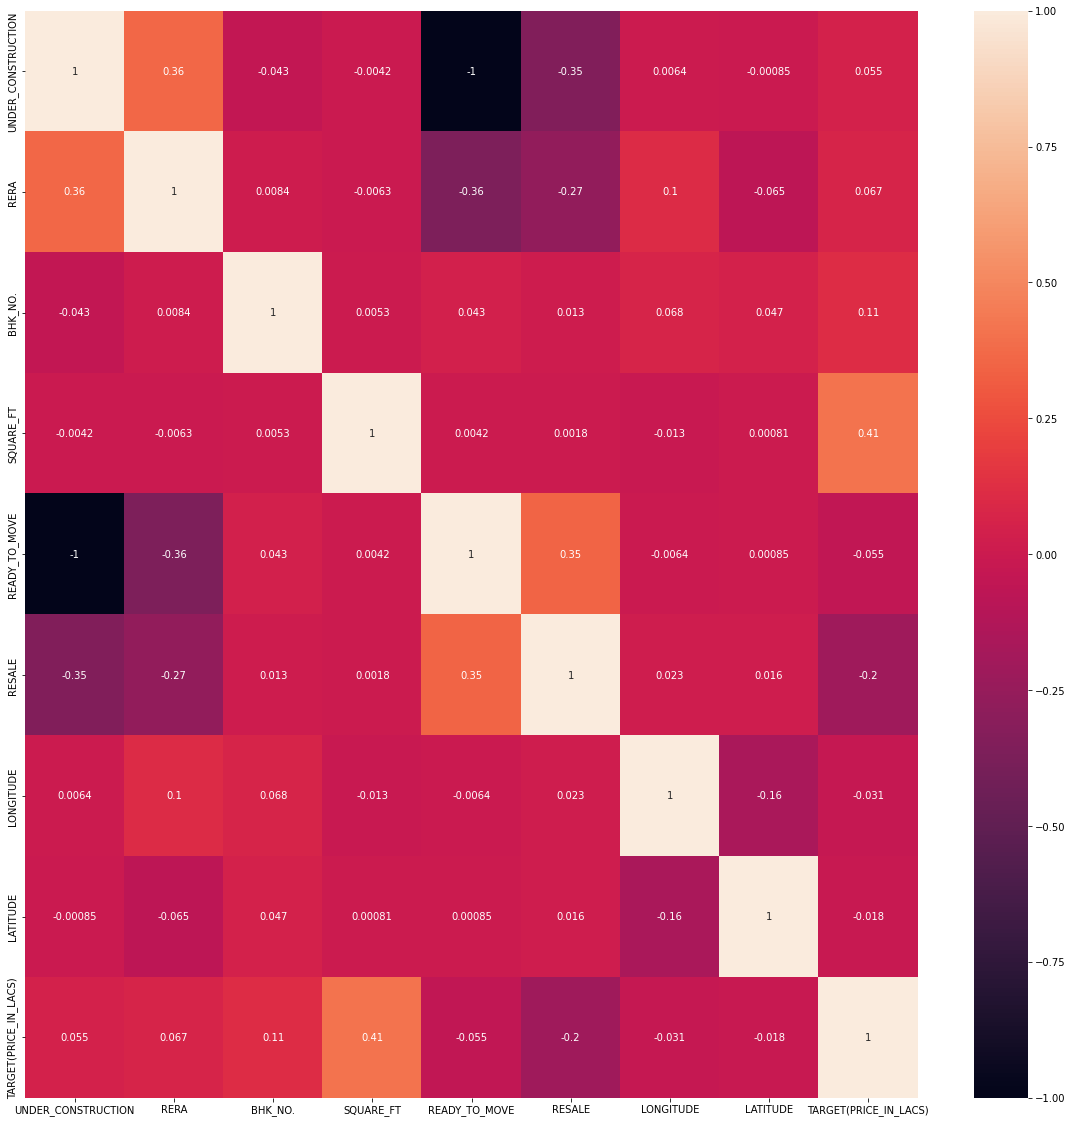

In [101]:
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(),annot=True)

 
- ###### the most correlated columns with `TARGET(PRICE_IN_LACS)` are `SQUARE_FT` and `BHK_NO`


### What Is the Covariance and Correlation of continous [`SQUARE_FT`,`LONGITUDE`,`LATITUDE`] columns the dataset wi th the target column `TARGET(PRICE_IN_LACS)`   

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='LATITUDE'>

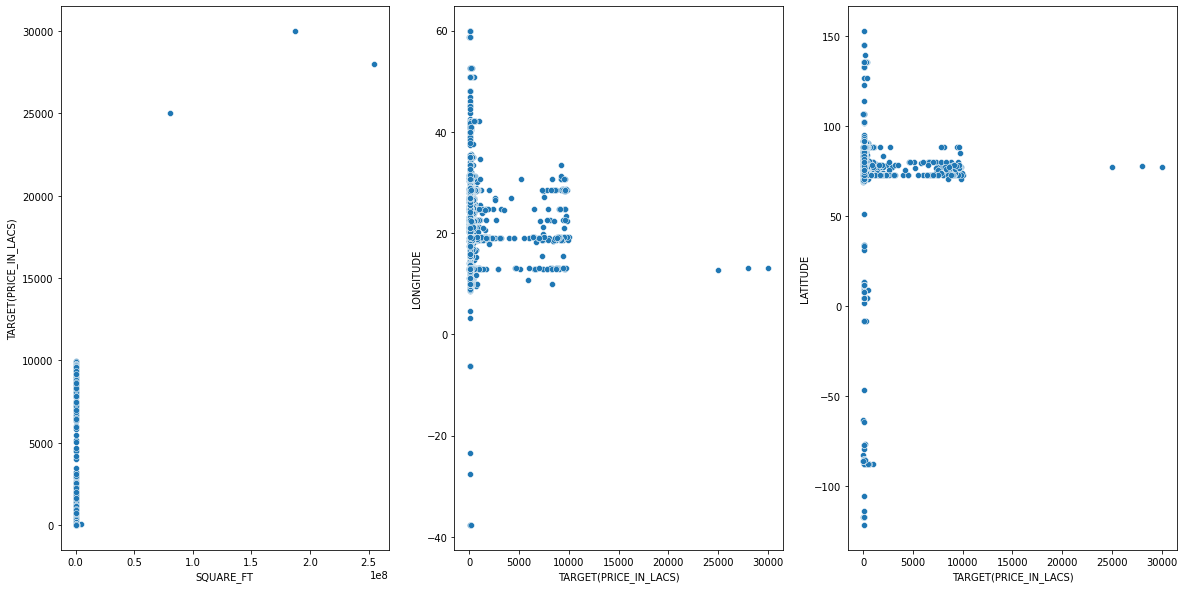

In [102]:
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
sns.scatterplot(x='SQUARE_FT',y='TARGET(PRICE_IN_LACS)',data=df)



plt.subplot(1,3,2)
sns.scatterplot(y='LONGITUDE',x='TARGET(PRICE_IN_LACS)',data=df)


plt.subplot(1,3,3)
sns.scatterplot(y='LATITUDE',x='TARGET(PRICE_IN_LACS)',data=df)


(0.0, 200.0)

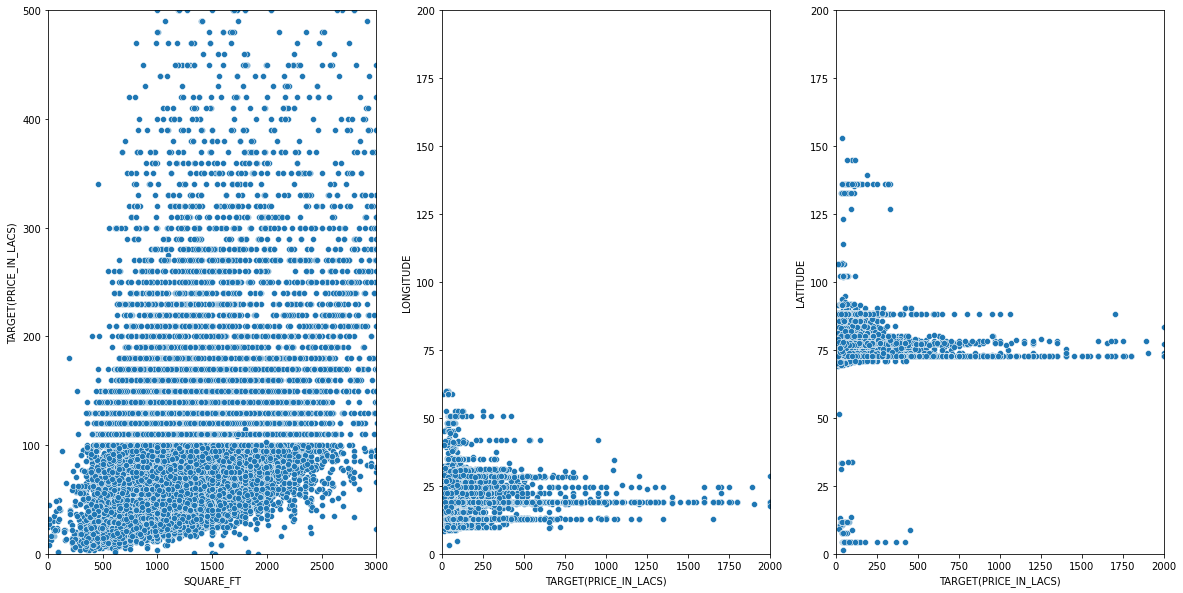

In [103]:
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
sns.scatterplot(x='SQUARE_FT',y='TARGET(PRICE_IN_LACS)',data=df)
plt.xlim([0,3000])
plt.ylim([0,500])


plt.subplot(1,3,2)
sns.scatterplot(y='LONGITUDE',x='TARGET(PRICE_IN_LACS)',data=df)
plt.xlim([0,2000])
plt.ylim([0,200])


plt.subplot(1,3,3)
sns.scatterplot(y='LATITUDE',x='TARGET(PRICE_IN_LACS)',data=df)
plt.xlim([0,2000])
plt.ylim([0,200])

- ###### The Price of the house increase with higher longitude , latitude and higher size of the house
- ###### The Traget Column ha positive covariance with SQUARE_FT column   
- ###### There are some Outlier That Needs to be removed 

#### Dose The Number fo rooms increase the house price

Text(0, 0.5, 'Average Price')

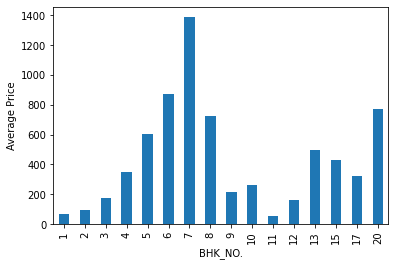

In [104]:
df.groupby('BHK_NO.').mean()['TARGET(PRICE_IN_LACS)'].plot(kind='bar')
plt.ylabel('Average Price')

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='BHK_NO.'>

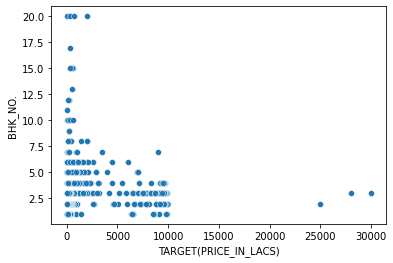

In [105]:
sns.scatterplot(x='TARGET(PRICE_IN_LACS)',y='BHK_NO.',data=df)

- ###### There are some Outlier That Needs to be removed 
- ###### the price of the house increases the higher number of rooms

# TYPE of Property BHK_OR_RK and target columns

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='BHK_OR_RK'>

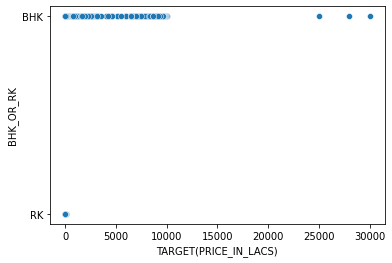

In [106]:
sns.scatterplot(x='TARGET(PRICE_IN_LACS)',y='BHK_OR_RK',data=df)

- ###### BHK houses is higher in the price 

# Which City dose Have the higher pricess


In [107]:
df['CITY']=df['ADDRESS'].apply(lambda x:x.split(',')[-1])
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,Vapi
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai


In [108]:
df.groupby(['CITY'])['TARGET(PRICE_IN_LACS)'].mean().nlargest(20)    


CITY
Cuddalore      650.000000
Gurgaon        396.777566
Vidisha        320.000000
Maharashtra    302.282304
Mumbai         264.987139
Lalitpur       249.490820
Goa            175.785906
Bangalore      159.617130
Chennai        142.177590
Hathras        140.000000
Pune           134.481591
Ranchi         134.347581
Kochi          133.881463
Noida          130.246106
Erode          123.000000
Nizamabad      120.000000
Mohali         118.931332
Jalgaon        114.311765
Panaji         111.246875
Kottayam       103.411111
Name: TARGET(PRICE_IN_LACS), dtype: float64

- ###### Cuddlier  have the higher house prices         


# Remove the Outlier

(24000.0, 40000.0)

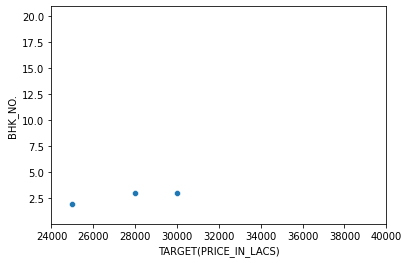

In [109]:
sns.scatterplot(x='TARGET(PRICE_IN_LACS)',y='BHK_NO.',data=df)
plt.xlim([24000,40000])

In [110]:
df.shape

(29050, 13)

In [111]:
df= df[~(df['TARGET(PRICE_IN_LACS)']>= 24000)]

In [113]:
df.shape

(29047, 13)

# Train The Models

In [123]:
def Metrcis(y_pred,y_true,prnt=False):
    'Function  Jst Wrap All the metrics that iam using'
    mean_absolute_error=metrics.mean_absolute_error(y_true,y_pred)
    mean_squared_error=metrics.mean_squared_error(y_true,y_pred)
    mean_absolute_percentage_error=metrics.mean_absolute_percentage_error(y_true,y_pred)
    r2_score=metrics.r2_score(y_true,y_pred)
    if prnt:
        print(f"\n mean_absolute_error ={mean_absolute_error} \n mean_squared_error={mean_squared_error} \n recall={mean_absolute_percentage_error} \n precs={mean_absolute_percentage_error} \n r2_score={r2_score}")

    return mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score


def convert(df,columns):
    'convert string column to number'
    for column in columns:
        dic={ val:i for i,val in enumerate(df[column].unique())}
        df[column]=df[column].map(dic)



 

In [124]:
convert(df,['POSTED_BY','BHK_OR_RK','CITY'])

c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [125]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,0,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0
1,1,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,1
2,0,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0
3,0,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,2
4,1,1,0,2,0,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,0,3,0,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,34
29447,0,0,0,2,0,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,23
29448,1,0,0,2,0,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,5
29449,0,0,0,2,0,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,7


In [126]:
y=df['TARGET(PRICE_IN_LACS)']
x=df.drop(['TARGET(PRICE_IN_LACS)','ADDRESS'],axis=1)


### Select Best Model Depending On The Acc Score, Also The Model Will have it's default Parameters

In [127]:
model_svc=SVR()
model_knn=KNeighborsRegressor()
model_lr=LinearRegression()
model_dt=DecisionTreeRegressor()
model_rf=RandomForestRegressor()

list_of_models=[model_svc,model_lr,model_knn,model_dt,model_rf,]
list_of_model_names=['SVR','LINEAR REG','KNN-R','DT-R','RANDOM FOREST -R']
X_train,X_test,y_train,y_test=train_test_split(x,y)



kfol=KFold(n_splits=10)
dic_k={'KNN-R':{'mean_squared_error':[],'r2_score':[]},'LR':{'mean_squared_error':[],'r2_score':[]},'SVR':{'mean_squared_error':[],'r2_score':[]},'DT-R':{'mean_squared_error':[],'r2_score':[]},'RF-R':{'mean_squared_error':[],'r2_score':[]}}

for t,te in kfol.split(X_train,y_train):
    train_x=X_train.iloc[t]
    train_y=y_train.iloc[t]

    val_x=X_train.iloc[te]
    val_y=y_train.iloc[te]

    print('Support Vector')
    model_svc.fit(train_x,train_y)
    mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score=Metrcis(model_svc.predict(val_x),val_y)
    
    dic_k['SVR']['mean_squared_error'].append(mean_squared_error)
    dic_k['SVR']['r2_score'].append(r2_score)

    
    print('KNN')
    model_knn.fit(train_x,train_y)
    mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score=Metrcis(model_knn.predict(val_x),val_y)

    dic_k['KNN-R']['mean_squared_error'].append(mean_squared_error)
    dic_k['KNN-R']['r2_score'].append(r2_score)



    print('LR')
    model_lr.fit(train_x,train_y);
    mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score=Metrcis(model_lr.predict(val_x),val_y)

    dic_k['LR']['mean_squared_error'].append(mean_squared_error)
    dic_k['LR']['r2_score'].append(r2_score)


    print('DT')
    model_dt.fit(train_x,train_y);
    mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score=Metrcis(model_dt.predict(val_x),val_y)

    dic_k['DT-R']['mean_squared_error'].append(mean_squared_error)
    dic_k['DT-R']['r2_score'].append(r2_score)

    print('RF')
    model_rf.fit(train_x,train_y);
    mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score=Metrcis(model_rf.predict(val_x),val_y)
    dic_k['RF-R']['mean_squared_error'].append(mean_squared_error)
    dic_k['RF-R']['r2_score'].append(r2_score)

print('-------------------------')
   


for k,v in dic_k.items():
    for k_n,v_n in dic_k[k].items():
        dic_k[k][k_n]=np.array(dic_k[k][k_n]).mean()
pd.DataFrame(dic_k)

Support Vector
KNN
LR
DT
RF
Support Vector
KNN
LR
DT
RF
Support Vector
KNN
LR
DT
RF
Support Vector
KNN
LR
DT
RF
Support Vector
KNN
LR
DT
RF
Support Vector
KNN
LR
DT
RF
Support Vector
KNN
LR
DT
RF
Support Vector
KNN
LR
DT
RF
Support Vector
KNN
LR
DT
RF
Support Vector
KNN
LR
DT
RF
-------------------------


,KNN-R,LR,SVR,DT-R,RF-R
mean_squared_error,61684.477861,1.297562e+06,343919.770492,25653.349528,16870.265612
r2_score,0.821054,-3.531543e+00,0.012148,0.924159,0.950141


> ######  Best Model Is RandomForest Regressor